## Titanic Survival Prediction Model  

In [95]:
#Step 1 : Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
# Step 2: Load dataset
df = pd.read_csv('Titanic_Project/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# Step 3: Initial Exploration :
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# Step 4 : Data Preprocessing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Insight 1 -> Age, Cabin,Embarked has null values. 

## Also the unique values like PassengerId,Cabin,Name,Ticket is not useful,so we need to remove it

In [24]:
# 1.Drop unuseful coloumns  from dataset
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [31]:
# We need to handle null values/missing values with median/ mode for age and Embarked
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df
#df.isnull().sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [29]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

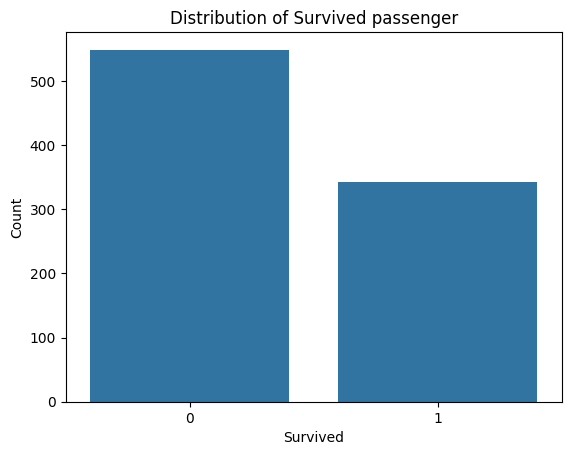

In [30]:
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived passenger')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

## Imbalance dataset we need to make it balanced dataset with smote after label encoding

In [39]:
##2: Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])       # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [41]:
# 3. To make balance dataset using smote 
oversample = SMOTE()
X, Y = oversample.fit_resample(df.drop('Survived',axis=1),df['Survived'])

In [42]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.250000,2
1,1,0,38.000000,1,0,71.283300,0
2,3,0,26.000000,0,0,7.925000,2
3,1,0,35.000000,1,0,53.100000,2
4,3,1,35.000000,0,0,8.050000,2
...,...,...,...,...,...,...,...
1093,1,0,49.947250,0,0,88.299592,0
1094,2,0,40.768787,0,0,18.632951,2
1095,2,0,29.820280,2,0,21.202185,1
1096,2,0,17.723704,0,1,13.133930,1


In [43]:
Y

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: Survived, Length: 1098, dtype: int64

In [50]:

df1_ = pd.DataFrame(X,columns = df.drop('Survived',axis=1).columns)
df2_ = pd.DataFrame(Y, columns = ['Survived'])

In [51]:
df1_

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.250000,2
1,1,0,38.000000,1,0,71.283300,0
2,3,0,26.000000,0,0,7.925000,2
3,1,0,35.000000,1,0,53.100000,2
4,3,1,35.000000,0,0,8.050000,2
...,...,...,...,...,...,...,...
1093,1,0,49.947250,0,0,88.299592,0
1094,2,0,40.768787,0,0,18.632951,2
1095,2,0,29.820280,2,0,21.202185,1
1096,2,0,17.723704,0,1,13.133930,1


In [46]:
df2_

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1093,1
1094,1
1095,1
1096,1


In [52]:
after_smote_df = pd.concat([df1_, df2_], axis=1)

In [53]:
print("INITIAL DATA SHAPE : ", df.shape)
print("AFTER SMOTE SHAPE : ", after_smote_df.shape)
# Now the data is balanced..we are keeping the original data as we will se the model performace with raw data as well.

INITIAL DATA SHAPE :  (891, 8)
AFTER SMOTE SHAPE :  (1098, 8)


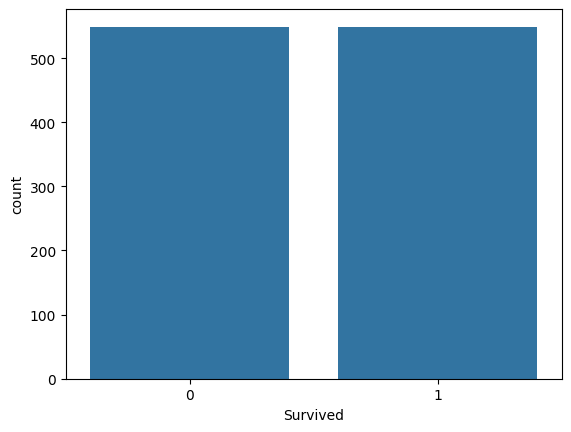

In [54]:
sns.countplot(x= 'Survived',data = after_smote_df)
plt.show()

In [55]:
new_samples = pd.DataFrame(X[len(df):])
print("Newly generated samples: \n", new_samples)

Newly generated samples: 
       Pclass  Sex        Age  SibSp  Parch       Fare  Embarked
891        2    0  25.234539      0      0  56.209556         2
892        2    0  24.000000      1      2  18.551674         2
893        1    0  25.860555      0      0  30.215139         2
894        1    0  44.181423      0      0  57.708009         0
895        1    0  50.327464      1      0  55.120530         0
...      ...  ...        ...    ...    ...        ...       ...
1093       1    0  49.947250      0      0  88.299592         0
1094       2    0  40.768787      0      0  18.632951         2
1095       2    0  29.820280      2      0  21.202185         1
1096       2    0  17.723704      0      1  13.133930         1
1097       1    0  26.875567      0      0  76.993098         0

[207 rows x 7 columns]


In [56]:
# Creating a copy of smote_df
fdf = after_smote_df

In [57]:
fdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Now let's check the distribution, Outliers, Correlation between the Independent Variables
## For Distribution = Histogram is used
## For Outliers = Boxplot is used
## For Correlation = ScatterPlot/Heatmap is used

In [68]:
# first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(3, 3, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

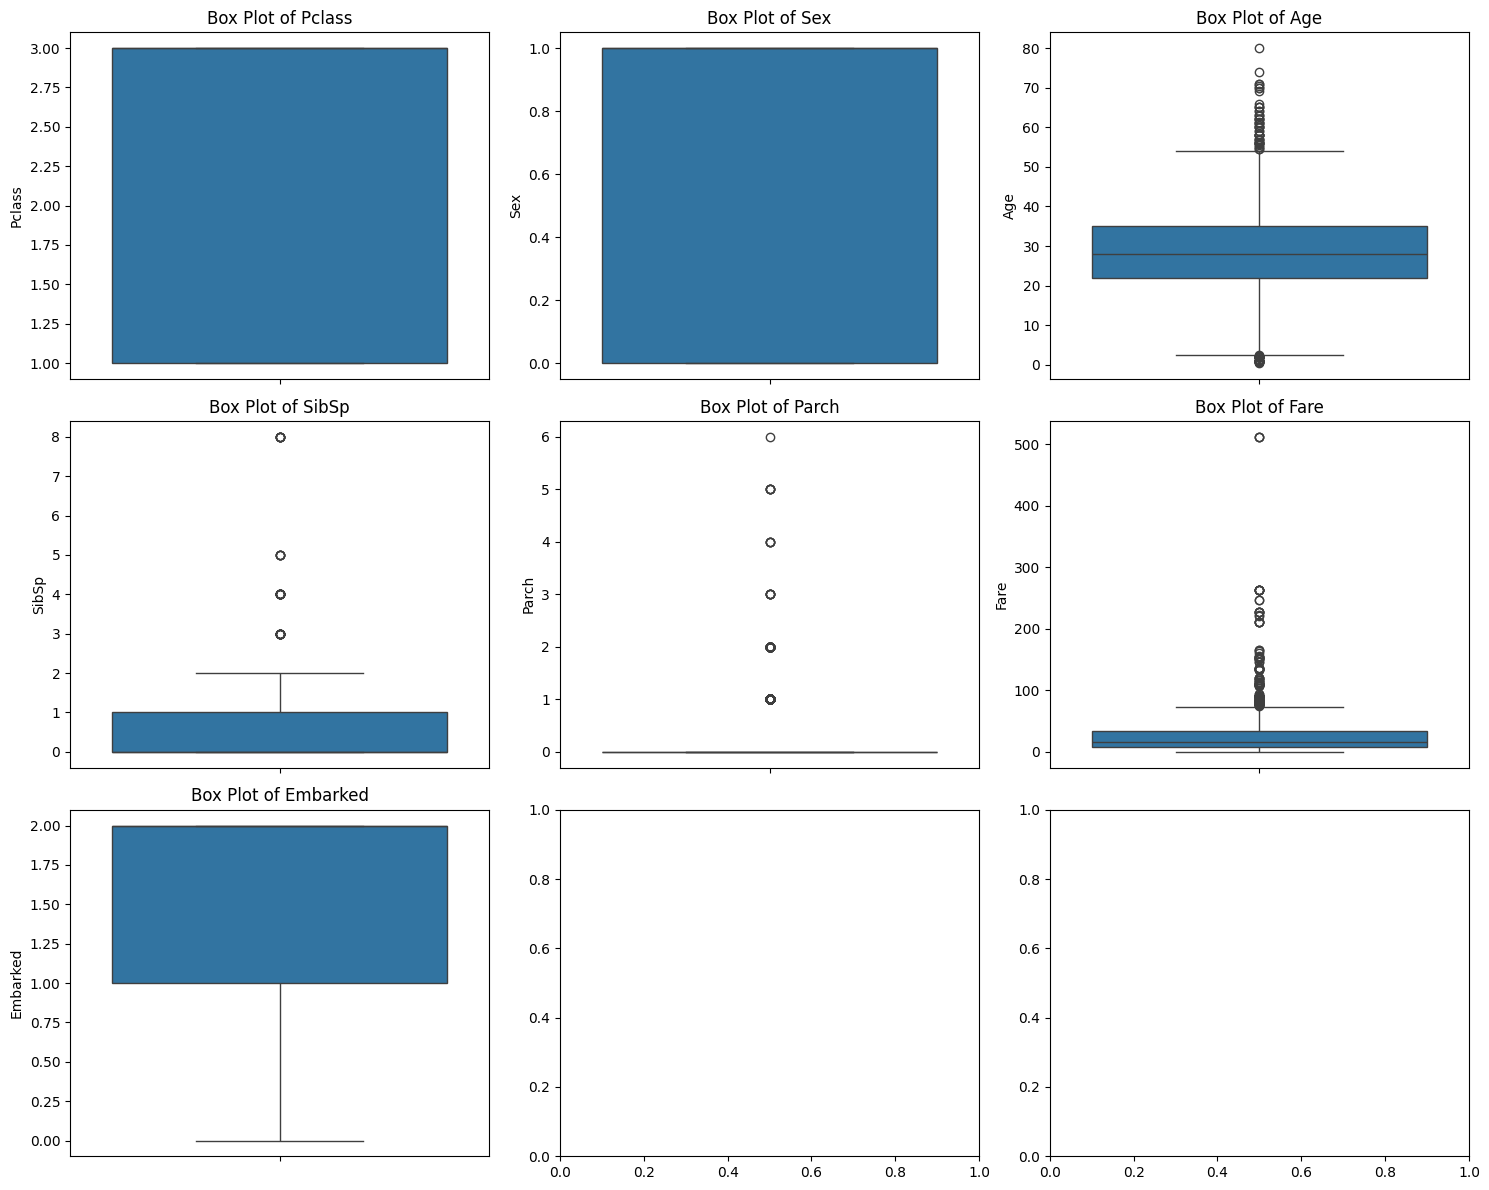

In [69]:
show_boxplots(fdf)

In [70]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [71]:
# Outliers are in 4 columns, we can get them using the following method
def get_outliers_count(df: pd.DataFrame):
#     desc_df = fdf.describe()
    outliers_count = {}

    for column in df.columns[:-1]:
        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count
         
        
    return outliers_count

In [72]:
outliers = get_outliers_count(fdf)
outliers
# You can verify these in the plot as well

{'Pclass': 0,
 'Sex': 0,
 'Age': 88,
 'SibSp': 46,
 'Parch': 261,
 'Fare': 139,
 'Embarked': 0}

## We can remove the outliers by imputing theri values with MEDIAN

In [74]:
fdf.shape

(1098, 8)

In [75]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()
            
            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [76]:
fdf = impute_outliers_with_median(fdf, outliers)

In [77]:
get_outliers_count(fdf)

{'Pclass': 0,
 'Sex': 0,
 'Age': 117,
 'SibSp': 0,
 'Parch': 0,
 'Fare': 68,
 'Embarked': 0}

In [78]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [80]:
# For printing the outliers
outl = find_outliers_IQR(fdf["Age"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 117
max outlier value: 54.0
min outlier value: 2.5657496584613266


6       54.000000
10       4.000000
24       8.000000
43       3.000000
50       7.000000
          ...    
1071    48.073645
1078    49.382176
1082     4.442248
1089    46.983184
1093    49.947250
Name: Age, Length: 117, dtype: float64

In [81]:
fdf = fdf.drop(outl.index)

In [82]:
outl = find_outliers_IQR(fdf["Fare"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 76
max outlier value: 73.5
min outlier value: 49.5


1       71.283300
3       53.100000
35      52.000000
54      61.979200
72      73.500000
          ...    
1050    53.320695
1055    52.428458
1070    65.051915
1074    56.774233
1080    52.442432
Name: Fare, Length: 76, dtype: float64

In [83]:
fdf = fdf.drop(outl.index)

In [84]:
fdf.skew()

Pclass     -0.680923
Sex        -0.270274
Age         0.130009
SibSp       1.757752
Parch       0.000000
Fare        1.183235
Embarked   -1.019487
Survived    0.135338
dtype: float64

## Check for correlation

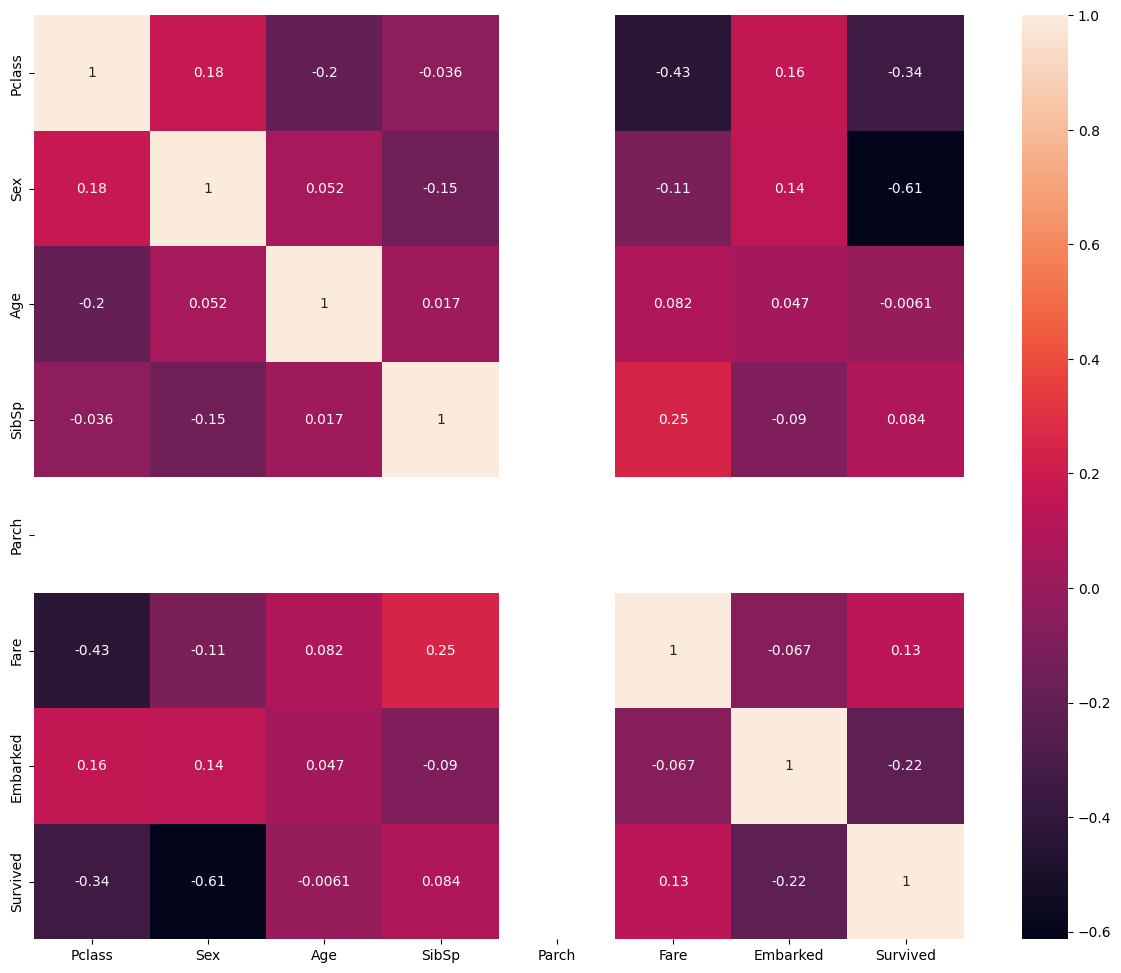

In [85]:
plt.figure(figsize=(15, 12))
sns.heatmap(fdf.corr(method='pearson'),annot=True)
plt.show()

In [86]:
#Step 5 : Data Modelling
#Define features and target
X = fdf.drop('Survived', axis=1)
y = fdf['Survived']


In [87]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
#Predit and Evaluation
y_pred = model.predict(X_test)

In [90]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.850828729281768

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85        90
           1       0.85      0.86      0.85        91

    accuracy                           0.85       181
   macro avg       0.85      0.85      0.85       181
weighted avg       0.85      0.85      0.85       181



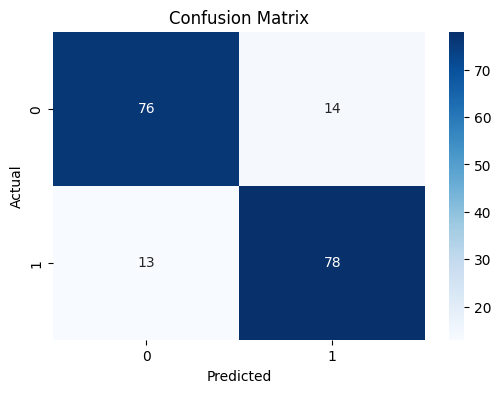

In [91]:
# Confusion Matrix to determine actual and Predicted data 
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [97]:
#Step 7 : Scaling (Standardization)
stand = StandardScaler()
stand_array = stand.fit_transform(fdf)
stand_array

array([[ 0.81500117,  0.87414676, -0.77897515, ..., -0.87805766,
         0.66679937, -0.93472242],
       [ 0.81500117, -1.14397267, -0.22803691, ..., -0.80208626,
         0.66679937,  1.06983633],
       [ 0.81500117,  0.87414676,  1.01157411, ..., -0.78801748,
         0.66679937, -0.93472242],
       ...,
       [-0.40615124, -1.14397267,  0.29814765, ...,  0.6922639 ,
        -0.56473824,  1.06983633],
       [-0.40615124, -1.14397267, -1.36796888, ..., -0.21582004,
        -0.56473824,  1.06983633],
       [-1.62730366, -1.14397267, -0.10744109, ...,  0.05048168,
        -1.79627585,  1.06983633]])

In [98]:
sdf = pd.DataFrame(stand_array) 
sdf

,0,1,2,3,4,5,6,7
0,0.815001,0.874147,-0.778975,1.477776,0.0,-0.878058,0.666799,-0.934722
1,0.815001,-1.143973,-0.228037,-0.521308,0.0,-0.802086,0.666799,1.069836
2,0.815001,0.874147,1.011574,-0.521308,0.0,-0.788017,0.666799,-0.934722
3,0.815001,0.874147,0.047432,-0.521308,0.0,-0.742063,-0.564738,-0.934722
4,0.815001,0.874147,0.047432,-0.521308,0.0,0.677949,0.666799,-0.934722
...,...,...,...,...,...,...,...,...
900,0.815001,0.874147,0.092393,-0.521308,0.0,-0.855908,-1.796276,1.069836
901,-0.406151,-1.143973,1.806135,-0.521308,0.0,0.403096,0.666799,1.069836
902,-0.406151,-1.143973,0.298148,3.476859,0.0,0.692264,-0.564738,1.069836
903,-0.406151,-1.143973,-1.367969,-0.521308,0.0,-0.215820,-0.564738,1.069836


In [100]:
print ("\nRescaled data:\n", sdf [0:5])


Rescaled data:
           0         1         2         3    4         5         6         7
0  0.815001  0.874147 -0.778975  1.477776  0.0 -0.878058  0.666799 -0.934722
1  0.815001 -1.143973 -0.228037 -0.521308  0.0 -0.802086  0.666799  1.069836
2  0.815001  0.874147  1.011574 -0.521308  0.0 -0.788017  0.666799 -0.934722
3  0.815001  0.874147  0.047432 -0.521308  0.0 -0.742063 -0.564738 -0.934722
4  0.815001  0.874147  0.047432 -0.521308  0.0  0.677949  0.666799 -0.934722


In [102]:
#  Predicting on a New Passenger (example)
new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],       # male
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [2]   # S
})
prediction = model.predict(new_passenger)
print("\nPrediction for new passenger:", "Survived" if prediction[0] == 1 else "Did not survive")


Prediction for new passenger: Did not survive
